In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('data/LGBT_Survey_TransgenderSpecificQuestions.csv')

In [3]:
df

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Transgender,tr1,Have you ever sought psychological or medical ...,Yes,35,NaN
1,Austria,Transgender,tr1,Have you ever sought psychological or medical ...,No,60,NaN
2,Austria,Transgender,tr1,Have you ever sought psychological or medical ...,Don`t know,5,[0]
3,Belgium,Transgender,tr1,Have you ever sought psychological or medical ...,Yes,48,NaN
4,Belgium,Transgender,tr1,Have you ever sought psychological or medical ...,No,37,NaN
...,...,...,...,...,...,...,...
3416,United Kingdom,Transgender,tr9,Do you avoid expressing your gender (or your d...,No,62,NaN
3417,United Kingdom,Transgender,tr9,Do you avoid expressing your gender (or your d...,Don`t know,3,NaN
3418,Average,Transgender,tr9,Do you avoid expressing your gender (or your d...,Yes,32,NaN
3419,Average,Transgender,tr9,Do you avoid expressing your gender (or your d...,No,60,NaN


In [4]:
q9 = df['question_code'] == 'tr9'
df_q9 = df[q9]

In [5]:
df_q9.question_label.unique()

array(['Do you avoid expressing your gender (or your desired gender) through your physical appearance and clothing for fear of being assaulted, threatened or harassed?'],
      dtype=object)

In [6]:
drop_av = df_q9["CountryCode"] != 'Average'

In [7]:
df_q9 = df_q9[drop_av]

In [8]:
df_q9

,CountryCode,subset,question_code,question_label,answer,percentage,notes
3334,Austria,Transgender,tr9,Do you avoid expressing your gender (or your d...,Yes,29,NaN
3335,Austria,Transgender,tr9,Do you avoid expressing your gender (or your d...,No,63,NaN
3336,Austria,Transgender,tr9,Do you avoid expressing your gender (or your d...,Don`t know,8,[0]
3337,Belgium,Transgender,tr9,Do you avoid expressing your gender (or your d...,Yes,27,NaN
3338,Belgium,Transgender,tr9,Do you avoid expressing your gender (or your d...,No,61,NaN
...,...,...,...,...,...,...,...
3413,Slovakia,Transgender,tr9,Do you avoid expressing your gender (or your d...,No,57,NaN
3414,Slovakia,Transgender,tr9,Do you avoid expressing your gender (or your d...,Don`t know,9,[0]
3415,United Kingdom,Transgender,tr9,Do you avoid expressing your gender (or your d...,Yes,35,NaN
3416,United Kingdom,Transgender,tr9,Do you avoid expressing your gender (or your d...,No,62,NaN


In [9]:
df_q9.drop(['subset', 'notes', 'question_code', 'question_label'],
           axis = 1, inplace = True)

In [10]:
df_q9.answer.unique()

array(['Yes', 'No', 'Don`t know'], dtype=object)

In [11]:
df_q9.percentage.unique()

array(['29', '63', '8', '27', '61', '12', '42', '16', '20', '60', '22',
       '69', '9', '64', '7', '24', '33', '67', '0', '34', '52', '14',
       '65', '10', '6', '36', '57', '13', '40', '51', '43', '5', '21',
       '68', '50', '39', '11', ':', '25', '71', '4', '47', '44', '56',
       '30', '28', '62', '35', '3'], dtype=object)

In [12]:
no_empty = df_q9['percentage'] != ":"
df_q9 = df_q9[no_empty]

In [13]:
df_q9.percentage.unique()

array(['29', '63', '8', '27', '61', '12', '42', '16', '20', '60', '22',
       '69', '9', '64', '7', '24', '33', '67', '0', '34', '52', '14',
       '65', '10', '6', '36', '57', '13', '40', '51', '43', '5', '21',
       '68', '50', '39', '11', '25', '71', '4', '47', '44', '56', '30',
       '28', '62', '35', '3'], dtype=object)

In [14]:
df_q9.loc[:,'percentage'] = pd.to_numeric(df_q9.loc[:,'percentage'] )

C:\Users\kazgd\AppData\Local\Temp\ipykernel_69848\3538793043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q9.loc[:,'percentage'] = pd.to_numeric(df_q9.loc[:,'percentage'] )


In [15]:
df_q9.percentage.unique()

array([29, 63,  8, 27, 61, 12, 42, 16, 20, 60, 22, 69,  9, 64,  7, 24, 33,
       67,  0, 34, 52, 14, 65, 10,  6, 36, 57, 13, 40, 51, 43,  5, 21, 68,
       50, 39, 11, 25, 71,  4, 47, 44, 56, 30, 28, 62, 35,  3],
      dtype=int64)

In [64]:
df_q9 = pd.pivot(df_q9, values = 'percentage', index = 'CountryCode', columns = 'answer')

In [72]:
df_q9['Yes'] = df_q9['Yes'] * -1

In [73]:
df_q9

answer,Don`t know,No,Yes
CountryCode,,,
Austria,8,63,-29
Belgium,12,61,-27
Bulgaria,16,42,-42
Croatia,13,60,-27
Cyprus,20,60,-20
Czech Republic,9,69,-22
Denmark,8,69,-24
Estonia,0,67,-33
Finland,6,67,-27


In [75]:
df_q9['Diff'] = df_q9['No'] + df_q9['Yes']

In [76]:
df_q9

answer,Don`t know,No,Yes,Diff
CountryCode,,,,
Austria,8,63,-29,34
Belgium,12,61,-27,34
Bulgaria,16,42,-42,0
Croatia,13,60,-27,33
Cyprus,20,60,-20,40
Czech Republic,9,69,-22,47
Denmark,8,69,-24,45
Estonia,0,67,-33,34
Finland,6,67,-27,40


In [87]:
df_q9.sort_values(by = 'Diff', inplace = True)

In [81]:
df_q9

answer,Don`t know,No,Yes,Diff
CountryCode,,,,
Czech Republic,9,69,-22,47
Italy,12,68,-21,47
Netherlands,4,71,-25,46
Denmark,8,69,-24,45
Spain,10,65,-24,41
Cyprus,20,60,-20,40
Finland,6,67,-27,40
Luxembourg,13,63,-24,39
Germany,7,64,-29,35


In [59]:
height = 0.25
yes_color = "#D95085"
no_color = "#BBBDF6"
dk_color = "#353535"

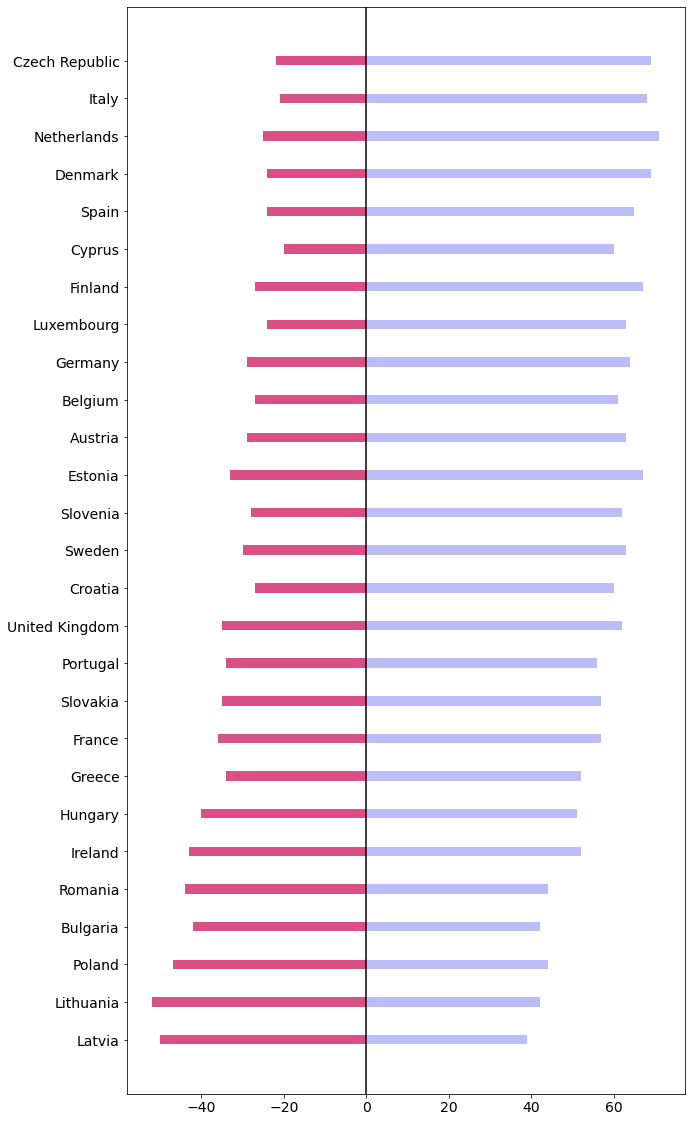

In [91]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize = (10,20))

plt.barh(df_q9.index, df_q9['Yes'], height = height, color = yes_color)
plt.barh(df_q9.index, df_q9['No'], height = height, color = no_color)
plt.axvline(0, color = 'black')

Thoughts:

* Want to create a graph that shows the no pct from -100 to 0 and yes from 0 to 100 - DONE
* need a line on the x axis at 0. This will give a reference point for when a country is showing more trans fear than not - DONE